## Import libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

## Read data from CSV file

In [2]:
dataset = pd.read_csv('Heart_disease_cleveland_new.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


# Now before performing data analysis, we will perfom DATA PREPROCESSING

In [3]:
# At first we will check for null values in the dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

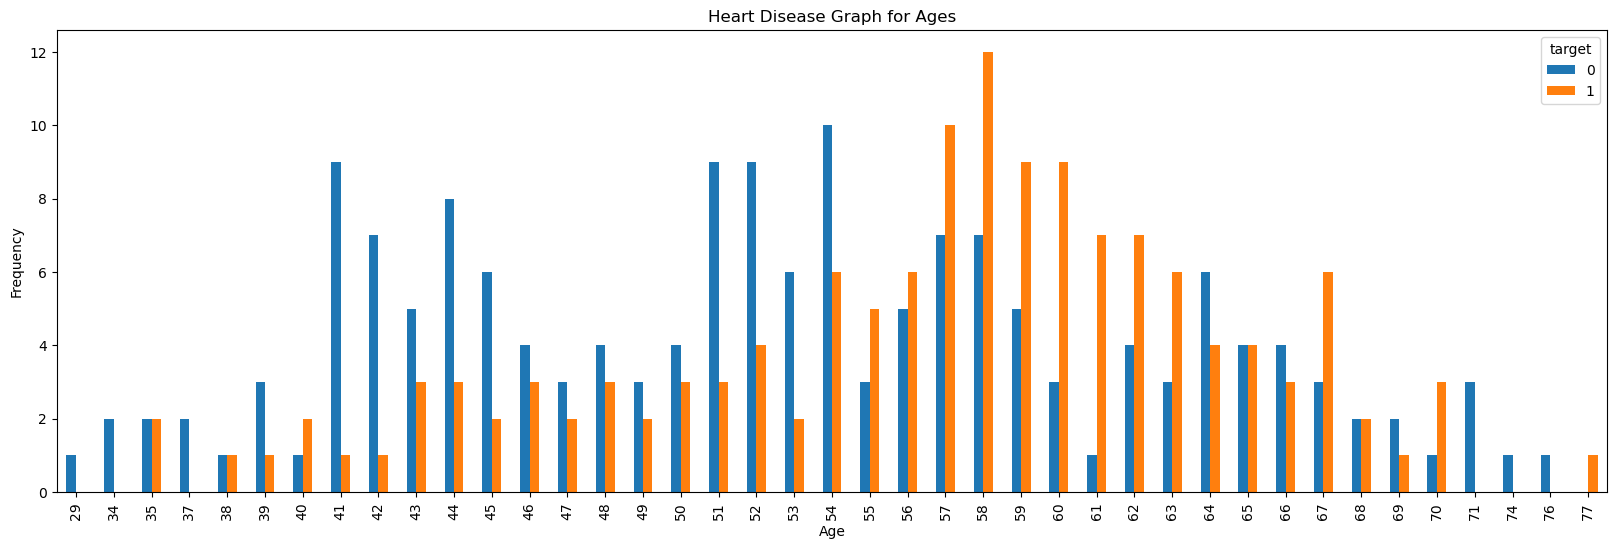

In [6]:
# now we will check at what age the disease is highly discovered
pd.crosstab(dataset['age'],dataset['target']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Graph for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target',axis=1)
Y = dataset['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=101)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [8]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 

SVC()

In [9]:
yhat = clf.predict(X_test)
yhat [0:303]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [11]:
# Funtion to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[40  9]
 [24 18]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71        49
           1       0.67      0.43      0.52        42

    accuracy                           0.64        91
   macro avg       0.65      0.62      0.61        91
weighted avg       0.64      0.64      0.62        91

Confusion matrix, without normalization
[[40  9]
 [24 18]]


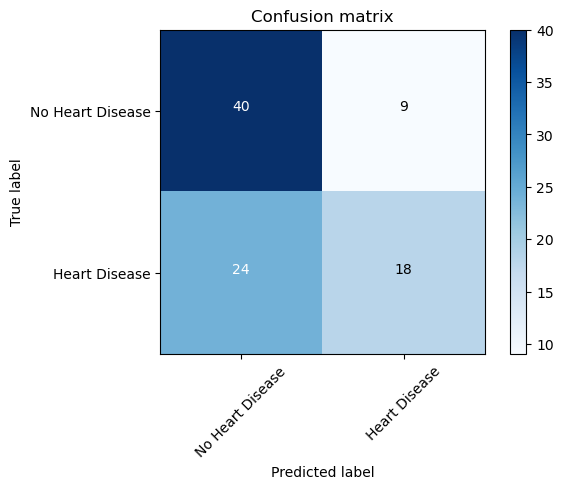

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,yhat)
print(cnf_matrix)
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],normalize= False,  title='Confusion matrix')

# 2nd try
## predicting using linear kernel


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [13]:
Y_pred_svm.shape

(91,)

In [14]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 82.42 %


## predicting using radial basis function kernel

In [17]:
from sklearn import svm

sv = svm.SVC(kernel='rbf')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

(91,)

In [18]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Random Basis Function SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Random Basis Function SVM is: 63.74 %


## predicting using polynomial kernel

In [19]:
sv = svm.SVC(kernel='poly')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

(91,)

In [20]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Polynomial SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Polynomial SVM is: 65.93 %


## predicting using sigmoid kernel

In [21]:
sv = svm.SVC(kernel='sigmoid')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

(91,)

In [22]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Sigmoid SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Sigmoid SVM is: 53.85 %


# We have got the most accurate results using linear kernel (i.e.) 82.42%
# now, we will try to pre-process the data furthur to improve the accuracy

In [23]:
sv = svm.SVC(C=1.0,break_ties=False, cache_size=200,class_weight=None, coef0=0.0, decision_function_shape='ovr',degree=3,gamma='scale',kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [24]:
Y_pred_svm.shape

(91,)

In [25]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 63.74 %


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[0.01,0.1,1.0,10,100,1000,10000,100000], 'gamma':[1,0.1,0.01,0.001,0.0001,0.00001,0.000001]}

grid = GridSearchCV(svm.SVC(),param_grid,verbose=2)

In [27]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             verbose=2)

In [28]:
grid_predictions = grid.predict(X_test)

In [29]:
grid_predictions.shape

(91,)

In [30]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        49
           1       0.82      0.74      0.78        42

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



[[42  7]
 [11 31]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        49
           1       0.82      0.74      0.78        42

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Confusion matrix, without normalization
[[42  7]
 [11 31]]


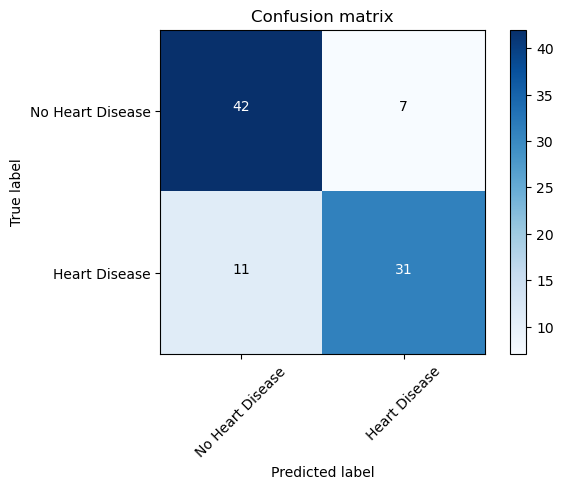

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,grid_predictions)
print(cnf_matrix)
np.set_printoptions(precision=2)

print (classification_report(Y_test, grid_predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],normalize= False,  title='Confusion matrix')

In [26]:
score_svm = round(accuracy_score(grid_predictions,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.22 %


# Using XGBoost algorithm

In [31]:
import pip
pip.main(['install', 'xgboost'])

C:\Users\USER\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: xgboost in c:\users\user\anaconda3\lib\site-packages (2.0.2)

Requirement already satisfied: numpy in c:\users\user\anaconda3\lib\site-packages (from xgboost) (1.24.3)

Requirement already satisfied: scipy in c:\users\user\anaconda3\lib\site-packages (from xgboost) (1.11.1)

0

In [32]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)


In [33]:
Y_pred_xgb.shape


(91,)

In [34]:
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        49
           1       0.75      0.71      0.73        42

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [40]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 75.82 %


# using Random forest algorithm


In [23]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
best_x = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('best_x = ')
print(best_x)
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

best_x = 
630


In [24]:
Y_pred_rf.shape

(91,)

In [25]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        49
           1       0.89      0.79      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [26]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 85.71 %


In [42]:
scores = [score_svm,score_rf,score_xgb]
algorithms = ["Support Vector Machine","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 80.22 %
The accuracy score achieved using Random Forest is: 85.71 %
The accuracy score achieved using XGBoost is: 75.82 %


In [43]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

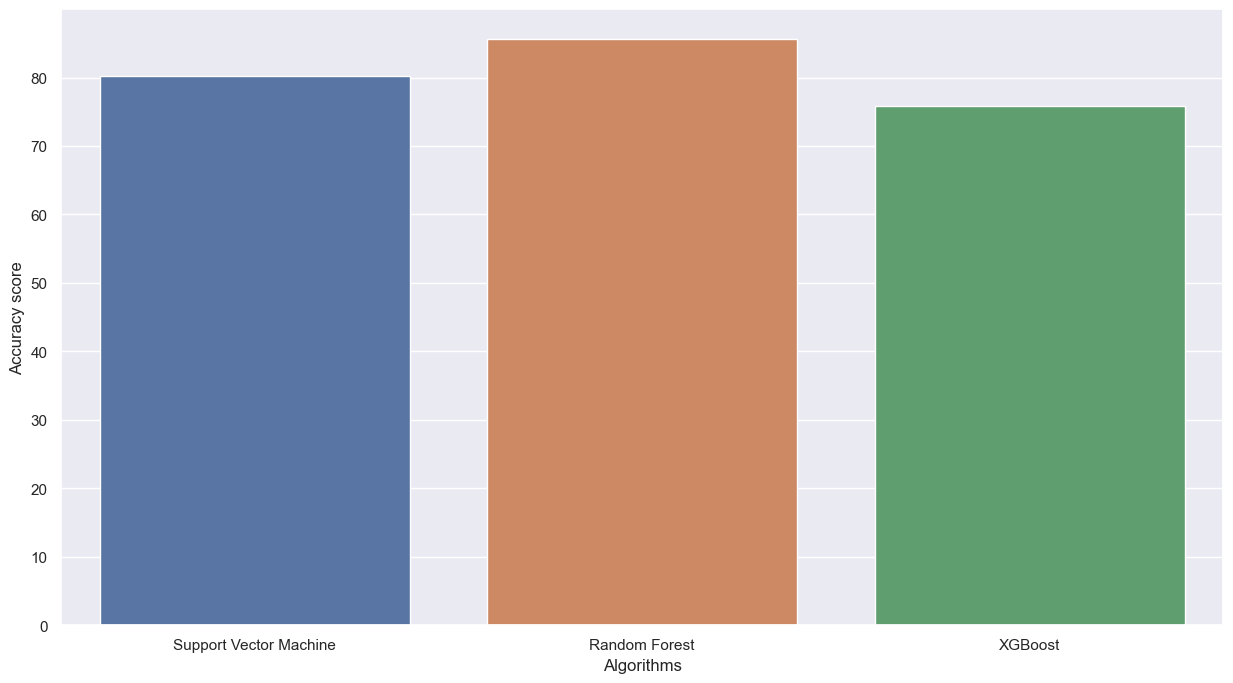

In [45]:

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset 'X' for features and 'y' for labels
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=630)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200,250,300,350,400,450,500],
    'max_depth': [None, 10, 20, 30,40,50,60,70,80,90,100],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4,8,16,32]
}
param_grid_2 =  {
    'n_estimators':[100,200,300],
    'max_features':['sqrt','log2',None],
    'random_state':[42,123,630],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_depth':[5,10,15],
    'class_weight':[None,'balanced'],
    'bootstrap':[True,False],
    'criterion':['gini','entropy']
}
# 𝑛_𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑜𝑟𝑠
# : [100, 200, 300]
# 𝑚𝑎𝑥_𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠
# : [’sqrt’, ’log2’, None]
# 𝑟𝑎𝑛𝑑𝑜𝑚_𝑠𝑡𝑎𝑡𝑒
# : [42, 123]
# 𝑚𝑖𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠_𝑠𝑝𝑙𝑖𝑡
# : [2, 5, 10]
# 𝑚𝑖𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠_𝑙𝑒𝑎𝑓
# : [1, 2, 5]
# 𝑚𝑎𝑥_𝑑𝑒𝑝𝑡ℎ
# : [5, 10, 15]
# 𝑐𝑙𝑎𝑠𝑠_𝑤𝑒𝑖𝑔ℎ𝑡
# : [None, "balanced"]
# 𝑏𝑜𝑜𝑡𝑠𝑡𝑟𝑎𝑝
# : [True, False]
# 𝑐𝑟𝑖𝑡𝑒𝑟𝑖𝑜𝑛
# : ["gini", "entropy"]
# Create a GridSearchCV object
grid_search = GridSearchCV(
    rf_classifier, param_grid=param_grid_2, scoring='accuracy', cv=5
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set using the best hyperparameters
Y_pred_rf = grid_search.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_rf)

# print("Test Accuracy with Best Hyperparameters:", accuracy)
print(classification_report(Y_test,Y_pred_rf))

Best Hyperparameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        49
           1       0.84      0.74      0.78        42

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

